# Implementing KMeans, Step by Step

In [1]:
# import necessary modules
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
from scipy.spatial import distance
import matplotlib.pyplot as plt

from sklearn import cluster
from kmeans import KMeans
from sklearn import datasets

from utils import plot_costs

In [2]:
X = np.array([[1, 2], [1, 4], [1, 0],
              [10, 2], [10, 4], [10, 0]])
n_clusters = 2
kmeans = cluster.KMeans(n_clusters=n_clusters, random_state=0).fit(X)
kmeans.labels_
kmeans.predict([[0, 0], [12, 3]])
kmeans.cluster_centers_

array([1, 1, 1, 0, 0, 0], dtype=int32)

array([1, 0], dtype=int32)

array([[10.,  2.],
       [ 1.,  2.]])

Starting from inference. KMeans require us to give the number of clusters. After fitting with data, we found `n` centers and labeling new data belongs to the center that it has the minimum distance. Note that, in general, centers are not points from `X`, although they live in the same space.

The first step is to initialize `n` centers. We use `np.random.shuffle` to shuffle the indices of `X` and then choose top `n`. Note that if `X` contains duplicate rows, you need to select `n` distinct centers. One way to acheive this is to use 

```python
unique_X = np.unique(X, axis=0)
```

In [3]:
X = np.array([[1, 2], [1, 4], [1, 0],
              [10, 2], [10, 4], [10, 0]])
m, _ = X.shape
indices = np.arange(m)
np.random.shuffle(indices)
cluster_centers_ = X[indices[:n_clusters]]

After we initialized centers, we iteratively update our centers and labels so that the sum of squared distance of between our training example and cluster centers are miminized. This is also called **inertia**.

For every iteration, we build labels to be a `(n,1)` array. And then calculate the mean value of example belong to that cluster and assign these mean value to be new centers.

```python
clusters = np.arange(n_clusters).reshape(n_clusters, 1)
cluster_centers_ = np.apply_along_axis(
                                lambda cluster: X[labels_ == cluster.item()].mean(axis=0), 
                                axis=1, arr=clusters)
```

Put all these together, we got

In [4]:
max_iter = 100
for it in range(max_iter):
    dists = distance.cdist(X, cluster_centers_, metric='euclidean')
    labels_ = np.argmin(dists, axis=1)
    clusters = np.arange(n_clusters).reshape(n_clusters, 1)
    cluster_centers_ = np.apply_along_axis(
                                lambda cluster: X[labels_ == cluster.item()].mean(axis=0), 
                                axis=1, arr=clusters)
labels_
cluster_centers_

array([0, 1, 0, 0, 1, 0])

array([[5.5, 1. ],
       [5.5, 4. ]])

In [5]:
np.argmin(distance.cdist([[0, 0], [12, 3]], cluster_centers_, metric='euclidean'), axis=1)

array([0, 1])

Note that, a key point in the iteration is how to calculate distance between two points. For efficiency purpose, we use [`distance.cdist`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.cdist.html) from scipy. You can also write your own distance function as:

```python
def pairwise_dist(x, y):
    """
    Args:
        x: N x D numpy array
        y: M x D numpy array
    Return:
        dist: N x M array, where dist2[i, j] is the euclidean distance between 
        x[i, :] and y[j, :]
    """
    return (np.sum((x[np.newaxis,:] - y[:, np.newaxis])**2, axis=-1)**0.5).T
```

To wrap all these functionalities in a class, we got

In [6]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
kmeans.labels_
kmeans.cluster_centers_
kmeans.predict([[0, 0], [12, 3]])

array([1, 1, 1, 0, 0, 0])

array([[10.,  2.],
       [ 1.,  2.]])

array([1, 0])

We mentioned that the goal of kmean iteration is to minimize **inertia**. You can save that value in an array and plot to see the progress of training.

```python
np.sum( np.sum(np.square(X[labels_ == c] - cluster_centers_[c])) for c in range(n_clusters) )
```

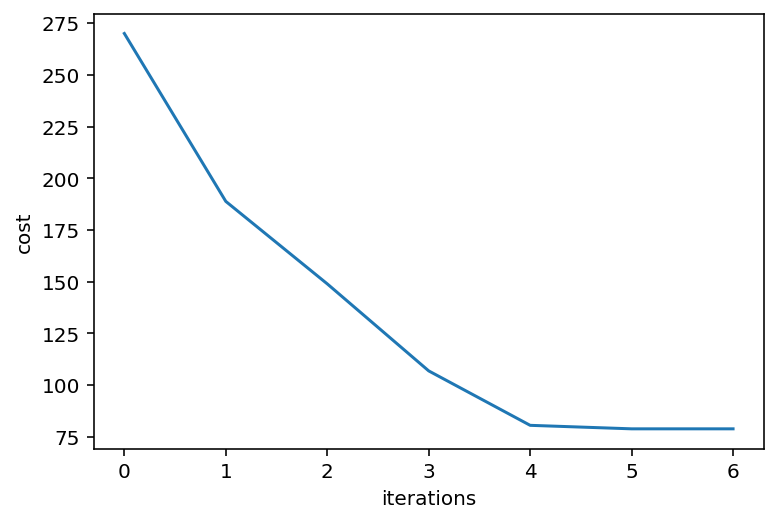

In [7]:
iris = datasets.load_iris()
kmeans = KMeans(n_clusters=3, random_state=0).fit(iris.data)
plot_costs(kmeans)

As you can see, kmeans is a pretty simply algorithm. Next, let's see what can we do with kmeans in [examples](https://github.com/nickyfoto/learn/blob/master/kmeans_example.ipynb).

## References

- https://scikit-learn.org/stable/modules/clustering.html#k-means